## Importez les données
On commence par charger les librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

On importe le fichier billets.csv qui contient 1500 lignes

In [2]:
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
# Liste des colonnes à convertir
colonnes_convertir = [colonne for colonne in billets.columns if colonne != 'is_genuine']

Vérification si des valeur sont nulles dans les colonnes du dataframe

In [3]:
# Utiliser la méthode apply pour appliquer la conversion aux colonnes appropriées
billets[colonnes_convertir] = billets[colonnes_convertir].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# Nombre de valeurs manquantes par colonne
nombre_valeurs_manquantes = billets.isna().sum()
print(nombre_valeurs_manquantes)

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


## régression lineaire pour combler les valeurs manquantes
Utilisation d’une régression linéaire multiples pour combler les valeurs vides.

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Supposons que 'billets' contient vos données
# billets = pd.read_csv('votre_fichier.csv')  # Charger vos données

# Remplacer 'is_genuine' par des valeurs numériques : 1 pour vrai, 0 pour faux
billets['is_genuine'] = billets['is_genuine'].astype(int)

# Séparer les lignes avec des valeurs manquantes (NaN) et celles sans
train_data = billets[billets['margin_low'].notna()]
missing_data = billets[billets['margin_low'].isna()]

# Définir la variable dépendante (y) et les variables indépendantes (X)
X_train = train_data[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = train_data['margin_low']

# Ajouter une constante pour le modèle
X_train = sm.add_constant(X_train)

# Ajuster le modèle de régression linéaire
model = sm.OLS(y_train, X_train).fit()

# Préparer les données manquantes pour les prédictions
X_missing = missing_data[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
X_missing = sm.add_constant(X_missing)

# Prédire les valeurs manquantes
predicted_values = model.predict(X_missing)

# Remplacer les valeurs manquantes dans le DataFrame original
billets.loc[billets['margin_low'].isna(), 'margin_low'] = predicted_values

# Afficher le nombre de valeurs manquantes restantes
print(billets['margin_low'].isna().sum())  # Cela devrait être 0 si toutes les valeurs manquantes ont été remplies.

0


Les lignes ont été mise a 0 en utilisant la methode de regression lineaire

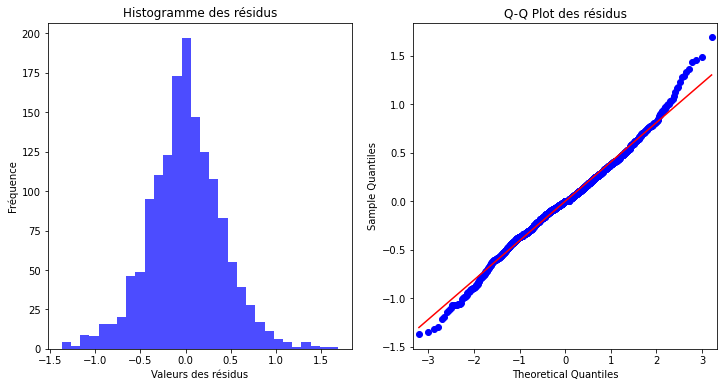

Shapiro-Wilk test: ShapiroResult(statistic=0.9921864867210388, pvalue=3.835668564988737e-07)
       variable            VIF
0         const  598133.866008
1    is_genuine       4.664689
2      diagonal       1.027393
3   height_left       1.181401
4  height_right       1.317733
5     margin_up       1.584021
6        length       3.593571


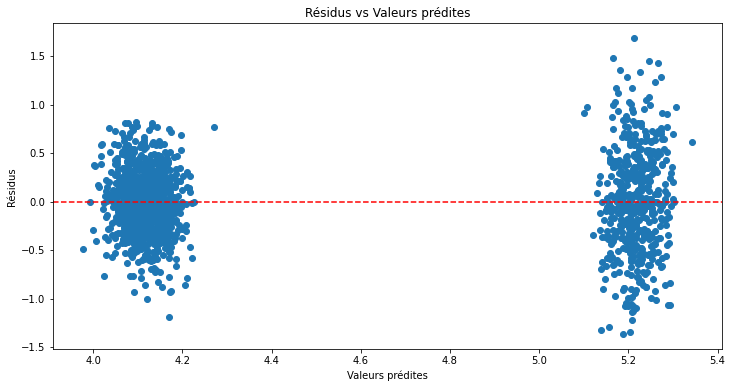

Breusch-Pagan test: (168.85749686108497, 7.85774694759908e-34, 31.56489534605584, 6.922975199952319e-36)
                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     409.3
Date:                Tue, 14 Jan 2025   Prob (F-statistic):          5.35e-311
Time:                        11:58:27   Log-Likelihood:                -774.98
No. Observations:                1500   AIC:                             1564.
Df Residuals:                    1493   BIC:                             1601.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supposons que 'billets' contient vos données et que vous avez déjà entraîné votre modèle
# Ajustement du modèle de régression sur les données complètes
train_data = billets[billets['margin_low'].notna()]
X_train = train_data[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = train_data['margin_low']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Obtention des résidus et prédictions
residuals = model.resid
predictions = model.predict()

# 1. Normalité des résidus
plt.figure(figsize=(12, 6))

# Histogramme des résidus
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.title('Histogramme des résidus')
plt.xlabel('Valeurs des résidus')
plt.ylabel('Fréquence')

# Q-Q Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot des résidus')
plt.show()

# Test de Shapiro
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test:', shapiro_test)

# 2. Colinéarité des variables (VIF)
vif_data = pd.DataFrame()
vif_data["variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

# 3. Homoscédasticité
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.show()

# Test de Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan test:', bp_test)
# Afficher le rapport de régression
print(model.summary())

Les différents tests de validité ont été mené pour voir si les valeurs qui ont été comblés sont cohérentes. On s’aperçoit notamment (la variance des erreurs (les résidus) d'un modèle de régression n'est pas constante à travers les différentes valeurs de la variable indépendante), **avec le test de breusch-Pagan une forte valeur de p qui indique une hétéroscédasticité**
Les 37 données represente 2,5% de la globalité des données , je vais donc supprimer les lignes avec la commande dropna.

In [6]:
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
# Liste des colonnes à convertir
colonnes_convertir = [colonne for colonne in billets.columns if colonne != 'is_genuine']
# Remplacer 'is_genuine' par des valeurs numériques : 1 pour vrai, 0 pour faux
billets['is_genuine'] = billets['is_genuine'].astype(int)
# Afficher le nombre de valeurs manquantes avant suppression
print("Nombre de valeurs manquantes avant suppression :")
print(billets.isna().sum())

# Supprimer les lignes avec des valeurs manquantes
billets = billets.dropna()

# Afficher le nombre de valeurs manquantes après suppression
print("\nNombre de valeurs manquantes après suppression :")
print(billets.isna().sum())

# Afficher la forme du DataFrame avant et après la suppression
print("\nForme du DataFrame avant : ", billets.shape)
print("Forme du DataFrame après : ", billets.shape)

Nombre de valeurs manquantes avant suppression :
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Nombre de valeurs manquantes après suppression :
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Forme du DataFrame avant :  (1463, 7)
Forme du DataFrame après :  (1463, 7)


In [7]:
reg_multi = smf.ols('is_genuine ~ diagonal + height_left + height_right + margin_low + margin_up + length', data=billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1322.
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:58:28   Log-Likelihood:                 384.34
No. Observations:                1463   AIC:                            -754.7
Df Residuals:                    1456   BIC:                            -717.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.2646      3.753     -3.268   

**R²** = 0.845 indique que 84.5% de la variance de la variable dépendante (is_genuine) est expliquée par les variables indépendantes de votre modèle. C'est un bon résultat qui indique un modèle performant
**F-statistic** = 1322, avec une p-value associée très faible (Prob (F-statistic) = 0.00), indique que votre modèle est hautement significatif. Cela signifie que, collectivement, les variables indépendantes améliorent significativement la capacité prédictive du modèle.

# Analyse descriptive

'Analyse descriptive :'

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


'\nCentroïdes des variables par classe :'

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.901402,104.188537,104.143272,5.215935,3.351504,111.632114
True,171.988476,103.951679,103.809094,4.116097,3.052544,113.203059


<Figure size 864x576 with 0 Axes>

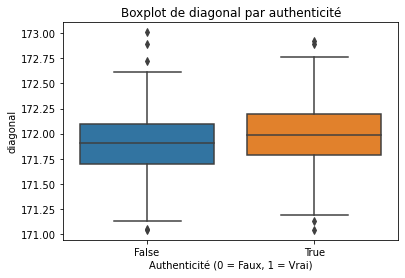

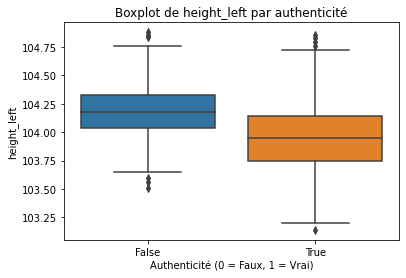

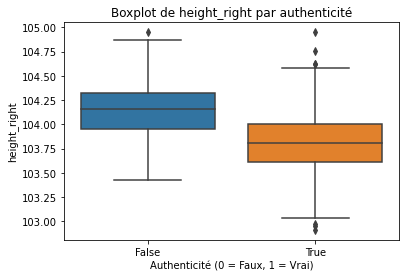

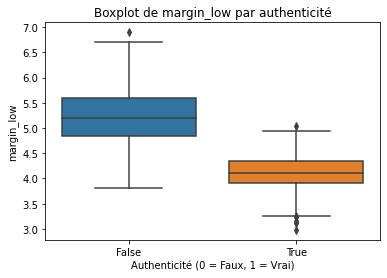

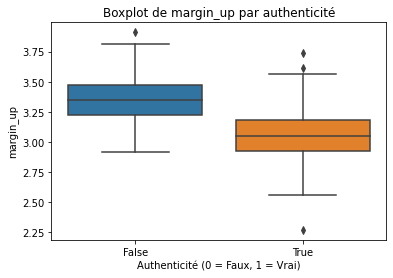

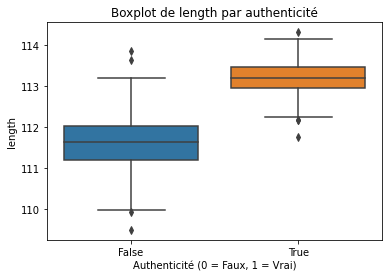

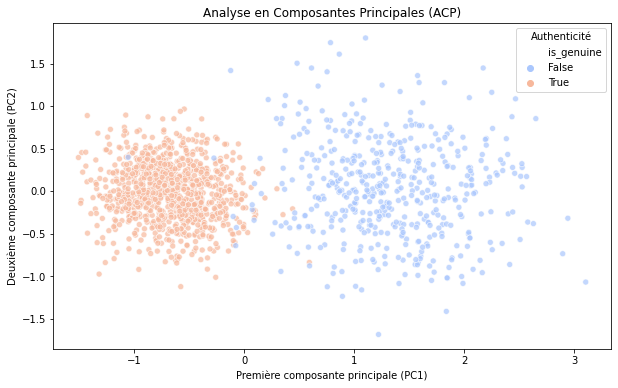

Test T pour diagonal : t-statistique = -5.1968, p-value = 0.0000
Test T pour height_left : t-statistique = 15.3960, p-value = 0.0000
Test T pour height_right : t-statistique = 21.3230, p-value = 0.0000
Test T pour margin_low : t-statistique = 48.1202, p-value = 0.0000
Test T pour margin_up : t-statistique = 29.4562, p-value = 0.0000
Test T pour length : t-statistique = -61.7338, p-value = 0.0000


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

# Charger le jeu de données
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
billets = billets.dropna()

# 1. Analyse descriptive
description = billets.describe()
display("Analyse descriptive :", description)

# 2. Calcul des centroïdes
centroids = billets.groupby('is_genuine').mean()
display("\nCentroïdes des variables par classe :", centroids)

# 3. Boxplots pour visualiser les différences
plt.figure(figsize=(12, 8))
for column in ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']:
    plt.figure()
    sns.boxplot(x='is_genuine', y=column, data=billets)
    plt.title(f'Boxplot de {column} par authenticité')
    plt.xlabel('Authenticité (0 = Faux, 1 = Vrai)')
    plt.ylabel(column)
    plt.show()

# 4. Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)
components = pca.fit_transform(billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']])
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['is_genuine'] = billets['is_genuine'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='is_genuine', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('Analyse en Composantes Principales (ACP)')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.legend(title='Authenticité')
plt.show()

# 5. Tests statistiques - Exemple de test T pour comparer deux groupes
for column in ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']:
    group_0 = billets[billets['is_genuine'] == 0][column]
    group_1 = billets[billets['is_genuine'] == 1][column]
    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    print(f'Test T pour {column} : t-statistique = {t_stat:.4f}, p-value = {p_value:.4f}')

# K-Means (apprentissage non supervisé)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


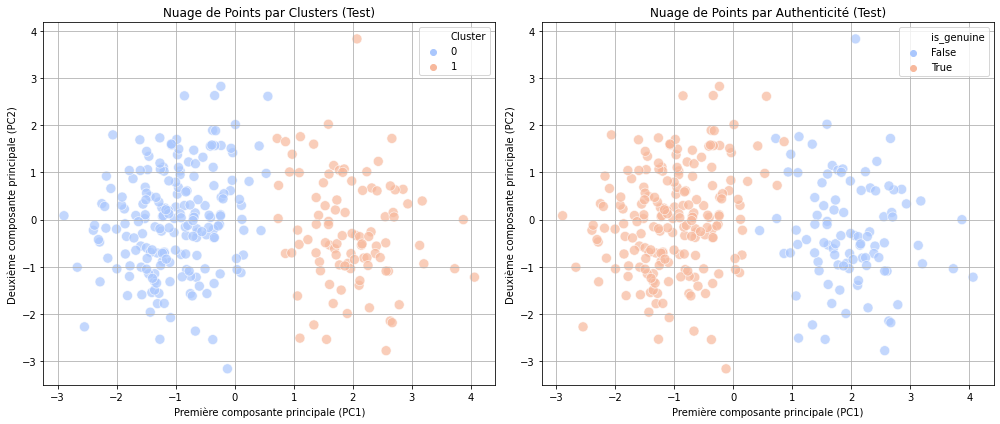

Centroïde True appartient au cluster : 1
Centroïde False appartient au cluster : 0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns

# Étape 1 : Charger le jeu de données
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
billets = billets.dropna()
display(billets)

# Étape 2 : Préparer les caractéristiques pour le clustering
features = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
labels = billets['is_genuine']  

# Étape 3 : Diviser les données en ensembles d'entraînement et de test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Étape 4 : Normalisation des données
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Étape 5 : Détermination du nombre optimal de clusters
optimal_k = 2  # Vous pouvez également utiliser la méthode du coude ici
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_train_scaled)

# Étape 6 : Ajout des labels de clusters au DataFrame d'entraînement et de test
billets['Cluster'] = np.nan  # Préparer pour ajouter les clusters
billets.loc[features_train.index, 'Cluster'] = kmeans.labels_  # Ajouter les labels d'entraînement
billets.loc[features_test.index, 'Cluster'] = kmeans.predict(features_test_scaled)  # Prédire les clusters pour test

# Étape 7 : Calcul des centroides
centroids = kmeans.cluster_centers_

# Étape 8 : ACP pour la visualisation
pca = PCA(n_components=2)
components_train = pca.fit_transform(features_train_scaled)
components_test = pca.transform(features_test_scaled)

# Étape 9 : Créer un DataFrame pour les résultats de l'ACP
pca_df_train = pd.DataFrame(data=components_train, columns=['PC1', 'PC2'])
pca_df_test = pd.DataFrame(data=components_test, columns=['PC1', 'PC2'])
pca_df_train['Cluster'] = kmeans.labels_
pca_df_test['Cluster'] = kmeans.predict(features_test_scaled)

# Ajouter les labels d'authenticité
pca_df_train['is_genuine'] = labels_train.values
pca_df_test['is_genuine'] = labels_test.values

# Étape 10 : Visualiser les résultats par Cluster
plt.figure(figsize=(14, 6))

# Nuage de points pour les clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_test, palette='coolwarm', alpha=0.7,s=100)
plt.title('Nuage de Points par Clusters (Test)')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.grid(True)

# Visualisation des résultats par authenticité
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='is_genuine', data=pca_df_test, palette='coolwarm', alpha=0.7, s=100)
plt.title('Nuage de Points par Authenticité (Test)')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.grid(True)

plt.tight_layout()
plt.show()
# Supposons que 'billets' soit votre DataFrame contenant les données avec 'is_genuine'
# Entraîner le modèle K-Means
optimal_k = 2  # Choisissez le nombre de clusters approprié
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
billets['Cluster'] = kmeans.fit_predict(billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']])

# Étape 2 : Calcul des centroïdes par authenticité
centroides_authentiques = billets[billets['is_genuine'] == 1].mean(axis=0)[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
centroides_faux = billets[billets['is_genuine'] == 0].mean(axis=0)[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Convertir en tableau pour prédiction
centroides = pd.DataFrame([centroides_authentiques, centroides_faux])

# Étape 3 : Prédiction des clusters pour les centroïdes
clusters_centroides = kmeans.predict(centroides)

# Affichage des résultats
for i, cluster in enumerate(clusters_centroides):
    print(f"Centroïde {'True' if i == 0 else 'False'} appartient au cluster : {cluster}")


Les deux nuages de point nous donnes des indications sur les futures predictions, dans le premier on voit la repartition par cluster. dans le second on voit la repartition par authenticité. On s'apercoit que globalement la repartition est identique.

On utilise les centroides pour predire si un billet est vrai ou faux.
on s'apercoit que les billet du cluster 1 sont majoritairement vrai, et ceux du cluster 0 sont majoritairement faux.
Nous pourrons ainsi predire si un billet est vrai ou faux suivant sa distance avec l'un ou l'autre des centroides.

## Prédiction Kmean


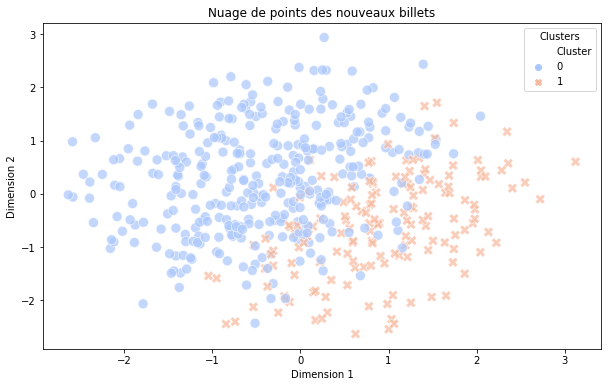

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Cluster,Probabilité_Vrai,Probabilité_Faux,Dimension1,Dimension2
0,198.77,98.70,97.34,3.14,6.74,110.16,NaN,0,0.416022,0.583978,-0.588347,-0.476662
1,193.46,119.49,81.66,4.96,9.18,133.17,NaN,0,0.429501,0.570499,-0.259197,0.901165
2,183.53,113.12,104.81,11.55,2.96,133.29,NaN,0,0.487426,0.512574,-0.513869,-1.319351
3,171.00,98.51,87.41,2.33,8.35,108.36,NaN,0,0.427579,0.572421,0.570954,1.452870
4,176.63,104.63,97.67,6.57,11.91,113.72,NaN,1,0.608544,0.391456,1.401560,0.375703
...,...,...,...,...,...,...,...,...,...,...,...,...
495,180.35,90.81,103.94,4.89,8.61,114.05,NaN,0,0.450543,0.549457,0.293052,-0.007623
496,162.51,110.63,107.61,8.79,4.87,128.66,NaN,0,0.499732,0.500268,0.002110,-0.017191
497,198.77,96.14,113.08,11.03,9.24,107.28,NaN,1,0.641233,0.358767,1.063725,-2.437788
498,197.53,113.58,119.35,5.99,3.87,101.06,NaN,1,0.539531,0.460469,-0.845295,-2.441860


In [10]:
import pandas as pd

# Charger le nouveau fichier
nouveaux_billets = pd.read_csv('new_data.csv', sep=",", decimal='.')

# Extraire les caractéristiques pertinentes
caracteristiques_nouv = nouveaux_billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Normaliser les données (ici en utilisant StandardScaler comme exemple, mais utilisez celui utilisé précédemment)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
caracteristiques_nouv_scaled = scaler.fit_transform(caracteristiques_nouv)
from sklearn.cluster import KMeans

# Charger votre modèle KMeans entraîné (si nécessaire)
# kmeans = ... # chargez votre modèle ici

# Étape 5 : Détermination du nombre optimal de clusters
optimal_k = 2  # Vous pouvez également utiliser la méthode du coude ici
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_train_scaled)
# Prédire les clusters pour les nouveaux billets
clusters_nouv = kmeans.predict(caracteristiques_nouv_scaled)

# Calculer les probabilités de chaque point d'appartenance à chaque cluster
proba_nouv = kmeans.transform(caracteristiques_nouv_scaled)
proba_nouv = proba_nouv / proba_nouv.sum(axis=1, keepdims=True)  # Normaliser pour obtenir des probabilités
nouveaux_billets['Cluster'] = clusters_nouv
nouveaux_billets['Probabilité_Vrai'] = proba_nouv[:, 0]  # Probabilité que le billet soit vrai
nouveaux_billets['Probabilité_Faux'] = proba_nouv[:, 1]  # Probabilité que le billet soit faux


pca = PCA(n_components=2)  # Réduire à 2 dimensions
caracteristiques_pca = pca.fit_transform(caracteristiques_nouv_scaled)
nouveaux_billets['Dimension1'] = caracteristiques_pca[:, 0]  # Première dimension
nouveaux_billets['Dimension2'] = caracteristiques_pca[:, 1]  # Deuxième dimension
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nouveaux_billets, x='Dimension1', y='Dimension2', hue='Cluster', style='Cluster', palette='coolwarm', alpha=0.7, s=100)
plt.title('Nuage de points des nouveaux billets')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Clusters')
plt.show()

display(nouveaux_billets)


### l'algorithme kmeans a été appliqué sur un fichier de 500 lignes avec des valeurs aleatoires, avec un ajout de la probabilité de detection des vrais et faux billets

## Régression logistique

Nombre de lignes dans le fichier : 1463
Matrice de confusion:
[[ 96   0]
 [  0 197]]


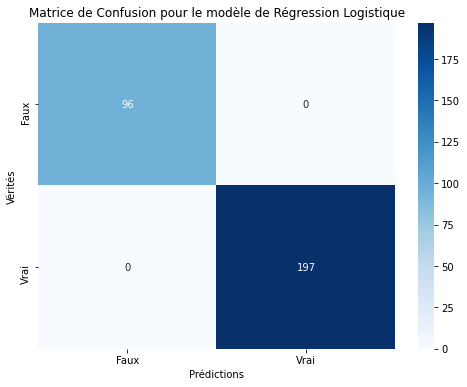


Rapport de classification:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        96
        True       1.00      1.00      1.00       197

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



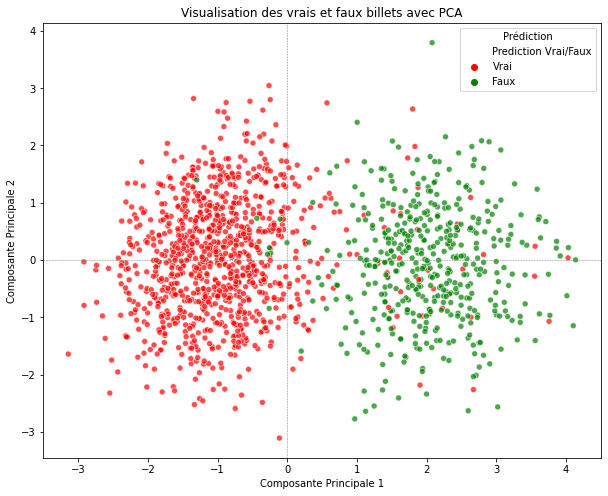

array([0.98634812, 0.98634812, 0.99658703, 0.98630137, 0.99315068])

In [25]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # N'oubliez pas d'importer seaborn si vous l'utilisez pour la visualisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Étape 1 : Charger le jeu de données
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
billets = billets.dropna()
print(f"Nombre de lignes dans le fichier : {len(billets)}")

# Sélection des fonctionnalités pour la régression
features = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
labels = billets['is_genuine']  

# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression logistique
model = LogisticRegression(random_state=42,max_iter=200)
model.fit(X_train, y_train)

# Affichage de la matrice de confusion
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux', 'Vrai'], yticklabels=['Faux', 'Vrai'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion pour le modèle de Régression Logistique')
plt.show()

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_scaled)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets['Probabilité Classe 0 (%)'] = (y_prob[:, 0] * 100).round(2)  # Pourcentage pour la classe 0
billets['Probabilité Classe 1 (%)'] = (y_prob[:, 1] * 100).round(2)  # Pourcentage pour la classe 1


# Ajouter une colonne 'Prédiction Vrai/Faux'
billets['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')

# Étape 1 : Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
features_pca = pca.fit_transform(features_scaled)

# Étape 2 : Créer un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['Prediction Vrai/Faux'] = billets['Prediction Vrai/Faux']  # Ajouter la colonne de prédiction

# Étape 3 : Visualiser le nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Prediction Vrai/Faux', palette=['red', 'green'], alpha=0.7)
plt.title('Visualisation des vrais et faux billets avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend(title='Prédiction')
plt.show()

# Validation croisée

scores = cross_val_score(model, features, labels, cv=5, scoring='accuracy')
display(scores)

### la derniere ligne est le cacul d'une validation croisée,  le set de données initial a été decoupé en 5 sous-ensemble, pour chaque sous ensemble 4 ont servi de données d'entrainements le 5eme  a servi de donnée de test.
### nous avons donc 5 valeurs sur la précision du modele, nous nous servirons de ces chiffres lors du choix du modele a privilegié. Nous calculerons l'ecart-type,  si celui ci est faible cela montrera que les données sont homogene et donc le modele plus robuste.

## Prédiction régréssion logistique

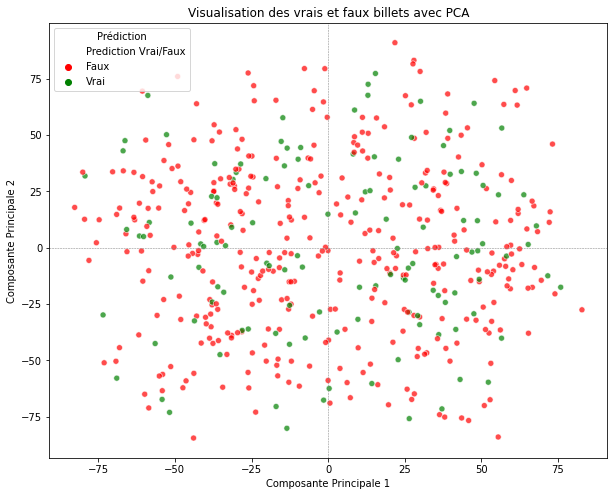

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité_Faux %,Probabilité_Vrai %,Prediction Vrai/Faux
0,198.77,98.70,97.34,3.14,6.74,110.16,NaN,70.0,30.0,Faux
1,193.46,119.49,81.66,4.96,9.18,133.17,NaN,43.0,57.0,Vrai
2,183.53,113.12,104.81,11.55,2.96,133.29,NaN,75.0,25.0,Faux
3,171.00,98.51,87.41,2.33,8.35,108.36,NaN,68.0,32.0,Faux
4,176.63,104.63,97.67,6.57,11.91,113.72,NaN,71.0,29.0,Faux
...,...,...,...,...,...,...,...,...,...,...
495,180.35,90.81,103.94,4.89,8.61,114.05,NaN,42.0,58.0,Vrai
496,162.51,110.63,107.61,8.79,4.87,128.66,NaN,87.0,13.0,Faux
497,198.77,96.14,113.08,11.03,9.24,107.28,NaN,90.0,10.0,Faux
498,197.53,113.58,119.35,5.99,3.87,101.06,NaN,100.0,0.0,Faux


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



# Charger le jeu de données de test
billets_test = pd.read_csv('new_data.csv', sep=",", decimal='.')

# Préparation des données de test
features_test = billets_test[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Normalisation des données de test (avec le scaler entraîné sur les données d'entraînement)
features_test_scaled = scaler.transform(features_test) 

# Prédictions sur le jeu de données de test
predictions = model.predict(features_test_scaled)

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_test_scaled)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets_test['Probabilité_Faux %'] = y_prob[:, 0] * 100  # Probabilité que le billet soit faux
billets_test['Probabilité_Vrai %'] = y_prob[:, 1] * 100  # Probabilité que le billet soit vrai

# Ajoutez les prédictions au DataFrame de test
billets_test['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')


# Étape 1 : Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
features_pca = pca.fit_transform(features_test_scaled)

# Étape 2 : Créer un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['Prediction Vrai/Faux'] = billets_test['Prediction Vrai/Faux']  # Ajouter la colonne de prédiction

# Étape 3 : Visualiser le nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Prediction Vrai/Faux', palette=['red', 'green'], alpha=0.7)
plt.title('Visualisation des vrais et faux billets avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend(title='Prédiction')
plt.show()

# Affichage des résultats
display(billets_test)






### la régression linéaire a été appliqué sur un fichier de 500 lignes avec des valeurs aleatoires, avec un ajout de la probabilité de detection des vrais et faux billets

# knn

### Validation croisé

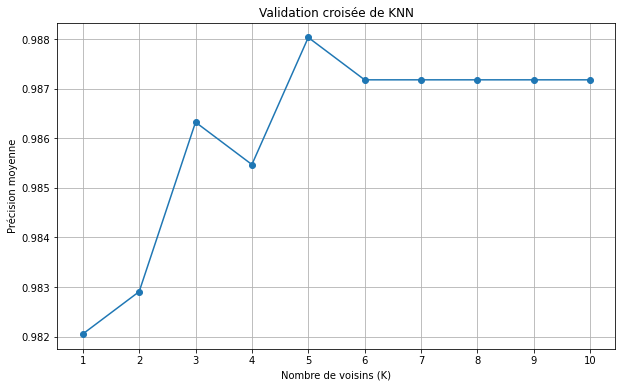

Le nombre optimal de voisins (K) est : 5


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt


# Sélectionnez les caractéristiques et l'étiquette
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = billets['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste pour stocker les scores
k_values = range(1, 11)
mean_scores = []

# Effectuer la validation croisée pour différentes valeurs de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Précision moyenne')
plt.title('Validation croisée de KNN')
plt.xticks(k_values)
plt.grid()
plt.show()

# Trouver le meilleur K
optimal_k = k_values[np.argmax(mean_scores)]
print(f"Le nombre optimal de voisins (K) est : {optimal_k}")

Matrice de confusion:


array([[ 96,   0],
       [  0, 197]], dtype=int64)

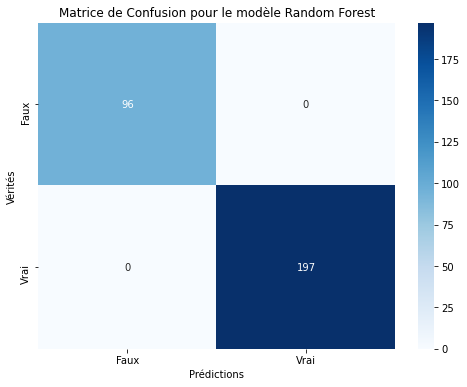


Rapport de classification:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        96
        True       1.00      1.00      1.00       197

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



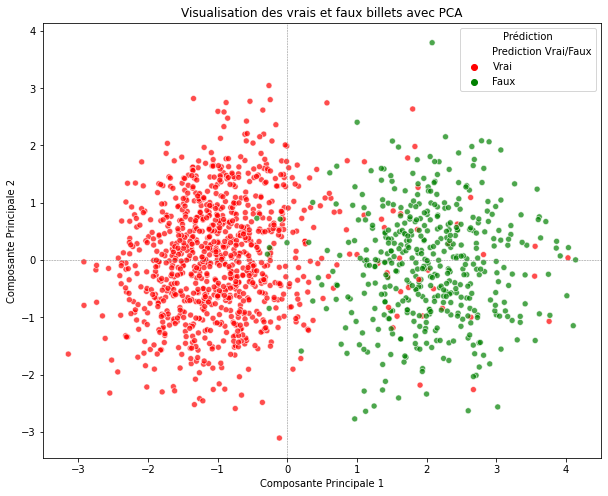

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Probabilité_Faux %,Probabilité_Vrai %,Prediction Vrai/Faux
0,True,171.81,104.86,104.95,4.52,2.89,112.83,40.0,60.0,Vrai
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.0,100.0,Vrai
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.0,100.0,Vrai
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.0,100.0,Vrai
4,True,171.73,104.28,103.46,4.04,3.48,112.54,40.0,60.0,Vrai
...,...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,100.0,0.0,Faux
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,100.0,0.0,Faux
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,100.0,0.0,Faux
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,100.0,0.0,Faux


array([0.98634812, 0.98634812, 0.99317406, 0.99315068, 0.98972603])

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
billets = pd.read_csv('billets.csv', sep=";", decimal=',')
billets = billets.dropna()


# Sélectionner les fonctionnalités pour KNN
features = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
labels = billets['is_genuine']  

# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Création et entraînement du modèle KNN
k = 5  # Choisissez un nombre de voisins, vous pouvez tester différentes valeurs
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Prédictions sur le jeu de données de test
predictions = model.predict(features_scaled)

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_scaled)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets['Probabilité_Faux %'] = y_prob[:, 0] * 100  # Probabilité que le billet soit faux
billets['Probabilité_Vrai %'] = y_prob[:, 1] * 100  # Probabilité que le billet soit vrai

billets['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
display(conf_matrix)
# Visualisation de la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux', 'Vrai'], yticklabels=['Faux', 'Vrai'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion pour le modèle Random Forest')
plt.show()

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Étape 1 : Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
features_pca = pca.fit_transform(features_scaled)

# Étape 2 : Créer un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['Prediction Vrai/Faux'] = billets['Prediction Vrai/Faux']  # Ajouter la colonne de prédiction

# Étape 3 : Visualiser le nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Prediction Vrai/Faux', palette=['red', 'green'], alpha=0.7)
plt.title('Visualisation des vrais et faux billets avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend(title='Prédiction')
plt.show()
# Affichage du DataFrame billets
display(billets)

scores = cross_val_score(model, features, labels, cv=5, scoring='accuracy')
display(scores)

### la derniere ligne est le cacul d'une validation croisée,  le set de données initial a été decoupé en 5 sous-ensemble, pour chaque sous ensemble 4 ont servi de données d'entrainements le 5eme  a servi de donnée de test.
### nous avons donc 5 valeurs sur la précision du modele, nous nous servirons de ces chiffres lors du choix du modele a privilegié. Nous calculerons l'ecart-type,  si celui ci est faible cela montrera que les données sont homogene et donc le modele plus robuste.

# sauvegarde du modele et du scaler

In [15]:
import joblib

# Supposons que 'model' est votre modèle entraîné
joblib.dump(model, 'billet_knn_model.pkl')  # Sauvegarde le modèle dans un fichier
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Prédiction KNN

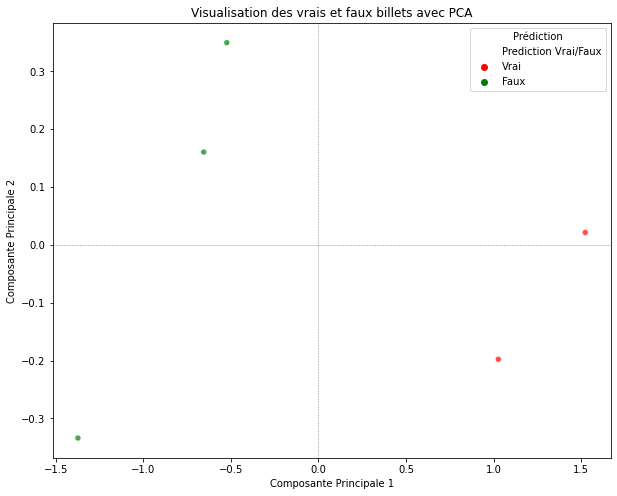

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité_Faux %,Probabilité_Vrai %,Prediction Vrai/Faux
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.0,100.0,Vrai
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,100.0,0.0,Faux
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.0,100.0,Vrai
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,100.0,0.0,Faux
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,100.0,0.0,Faux


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Charger le jeu de données de test
billets_test = pd.read_csv('billets_test.csv', sep=",", decimal='.')

# Préparation des données de test
features_test = billets_test[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Normalisation des données de test (avec le scaler entraîné sur les données d'entraînement)
features_test_scaled = scaler.transform(features_test)  

# Prédictions sur le jeu de données de test
predictions = model.predict(features_test_scaled)

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_test_scaled)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets_test['Probabilité_Faux %'] = y_prob[:, 0] * 100  # Probabilité que le billet soit faux
billets_test['Probabilité_Vrai %'] = y_prob[:, 1] * 100  # Probabilité que le billet soit vrai

billets_test['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')
# Étape 1 : Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
features_pca = pca.fit_transform(features_test)

# Étape 2 : Créer un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['Prediction Vrai/Faux'] = billets_test['Prediction Vrai/Faux']  # Ajouter la colonne de prédiction

# Étape 3 : Visualiser le nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Prediction Vrai/Faux', palette=['red', 'green'], alpha=0.7)
plt.title('Visualisation des vrais et faux billets avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend(title='Prédiction')
plt.show()
# Affichage des résultats
display(billets_test)


# random forest

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Probabilité_Faux %,Probabilité_Vrai %,Prediction Vrai/Faux
0,True,171.81,104.86,104.95,4.52,2.89,112.83,40.0,60.0,Vrai
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.0,100.0,Vrai
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.0,100.0,Vrai
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.0,100.0,Vrai
4,True,171.73,104.28,103.46,4.04,3.48,112.54,40.0,60.0,Vrai
...,...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,100.0,0.0,Faux
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,100.0,0.0,Faux
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,100.0,0.0,Faux
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,100.0,0.0,Faux


Matrice de confusion:
[[ 96   0]
 [  1 196]]


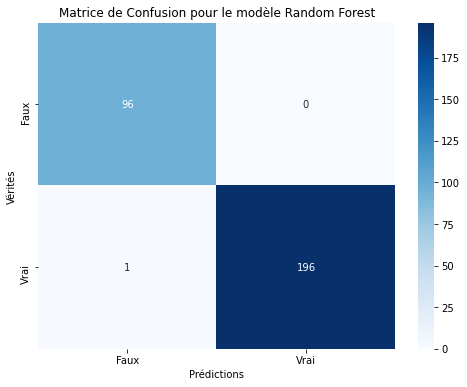


Rapport de classification:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99        96
        True       1.00      0.99      1.00       197

    accuracy                           1.00       293
   macro avg       0.99      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



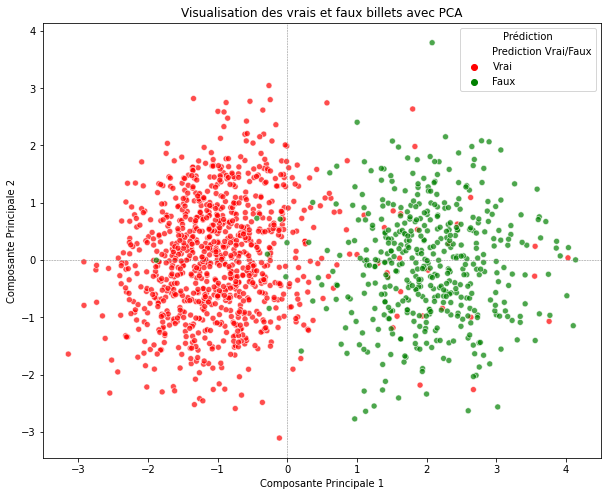

array([0.98976109, 0.98634812, 0.99658703, 0.99657534, 0.98972603])

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Affichage du DataFrame billets
display(billets)

# Sélectionner les fonctionnalités pour Random Forest
features = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
labels = billets['is_genuine'] 

# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Création et entraînement du modèle de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Vous pouvez ajuster le nombre d'arbres
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)
# Visualisation de la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux', 'Vrai'], yticklabels=['Faux', 'Vrai'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion pour le modèle Random Forest')
plt.show()

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))
# Prédictions sur le jeu de données de test
predictions = model.predict(features_scaled)

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_scaled)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets['Probabilité_Faux %'] = y_prob[:, 0] * 100  # Probabilité que le billet soit faux
billets['Probabilité_Vrai %'] = y_prob[:, 1] * 100  # Probabilité que le billet soit vrai

billets['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')
# Étape 1 : Appliquer la PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
features_pca = pca.fit_transform(features_scaled)

# Étape 2 : Créer un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['Prediction Vrai/Faux'] = billets['Prediction Vrai/Faux']  # Ajouter la colonne de prédiction

# Étape 3 : Visualiser le nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Prediction Vrai/Faux', palette=['red', 'green'], alpha=0.7)
plt.title('Visualisation des vrais et faux billets avec PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend(title='Prédiction')
plt.show()
scores = cross_val_score(model, features, labels, cv=5, scoring='accuracy')
display(scores)

### la derniere ligne est le cacul d'une validation croisée,  le set de données initial a été decoupé en 5 sous-ensemble, pour chaque sous ensemble 4 ont servi de données d'entrainements le 5eme  a servi de donnée de test.
### nous avons donc 5 valeurs sur la précision du modele, nous nous servirons de ces chiffres lors du choix du modele a privilegié. Nous calculerons l'ecart-type,  si celui ci est faible cela montrera que les données sont homogene et donc le modele plus robuste.

## Prédiction random forest

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Charger le jeu de données de test
billets_test = pd.read_csv('new_data.csv', sep=",", decimal='.')


# Préparation des données de test
features_test = billets_test[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Normalisation des données de test (avec le scaler entraîné sur les données d'entraînement)
features_test_scaled = scaler.transform(features_test)  # Ici, on utilise transform

# Prédictions sur le jeu de données de test
predictions = model.predict(features_scaled)

# Récupération des probabilités de prédiction
y_prob = model.predict_proba(features_test)  # Obtenez les probabilités pour toutes les données

# Ajout des probabilités dans le DataFrame 'billets'
billets_test['Probabilité_Faux %'] = y_prob[:, 0] * 100  # Probabilité que le billet soit faux
billets_test['Probabilité_Vrai %'] = y_prob[:, 1] * 100  # Probabilité que le billet soit vrai

billets_test['Prediction Vrai/Faux'] = np.where(y_prob[:, 1] > 0.5, 'Vrai', 'Faux')


# Affichage des résultats
display(billets_test)

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité_Faux %,Probabilité_Vrai %,Prediction Vrai/Faux
0,198.77,98.70,97.34,3.14,6.74,110.16,NaN,79.0,21.0,Faux
1,193.46,119.49,81.66,4.96,9.18,133.17,NaN,79.0,21.0,Faux
2,183.53,113.12,104.81,11.55,2.96,133.29,NaN,79.0,21.0,Faux
3,171.00,98.51,87.41,2.33,8.35,108.36,NaN,79.0,21.0,Faux
4,176.63,104.63,97.67,6.57,11.91,113.72,NaN,79.0,21.0,Faux
...,...,...,...,...,...,...,...,...,...,...
495,180.35,90.81,103.94,4.89,8.61,114.05,NaN,79.0,21.0,Faux
496,162.51,110.63,107.61,8.79,4.87,128.66,NaN,79.0,21.0,Faux
497,198.77,96.14,113.08,11.03,9.24,107.28,NaN,79.0,21.0,Faux
498,197.53,113.58,119.35,5.99,3.87,101.06,NaN,79.0,21.0,Faux


In [47]:
# Les tableaux de validation croisée pour chaque modèle
scores1 = np.array([0.98634812, 0.98634812, 0.99658703, 0.98630137, 0.99315068])
scores2 = np.array([0.98634812, 0.98634812, 0.99317406, 0.99315068, 0.98972603])
scores3 = np.array([0.98976109, 0.98634812, 0.99658703, 0.99657534, 0.98972603])

# Calcul de la moyenne et de l'écart-type pour chaque tableau
results = {
    'Tableau': ['Tableau 1', 'Tableau 2', 'Tableau 3'],
    'Précision Moyenne': [scores1.mean(), scores2.mean(), scores3.mean()],
    'Écart-Type': [scores1.std(), scores2.std(), scores3.std()],
}

# Affichage des résultats
for table, mean, std in zip(results['Tableau'], results['Précision Moyenne'], results['Écart-Type']):
    print(f"{table}: Précision Moyenne = {mean:.4f}, Écart-Type = {std:.4f}")

Tableau 1: Précision Moyenne = 0.9897, Écart-Type = 0.0043
Tableau 2: Précision Moyenne = 0.9897, Écart-Type = 0.0030
Tableau 3: Précision Moyenne = 0.9918, Écart-Type = 0.0041


## Conclusion
### Pour chaque modèle entrainé nous avons fait une validation croisée sur la précision. Le nombre de plis choisit a été 5  c’est-à-dire que les données ont été fractionné en 5 sous-ensembles. Ensuite pour chaque pli on entraine le modèle sur 4 plis et on teste sur le 5eme, cela nous donne 5 valeurs de précision.
### Pour pouvoir comparer l’efficacité de chaque modèle , une moyenne de ces 5 valeurs a été effectués et l’écart type a été calculé. L’écart type nous permet de voir le modèle le plus robuste, plus l’écart-type est faible plus les données sont homogènes et donc le modèle plus robuste. 
# On peut donc voir que le meilleurs modèle est le KNN
